## **Описание проекта: Оценка рисков невозврата кредита**

Банк «Скрудж» разрабатывает систему кредитного скоринга для оценки потенциальных заемщиков.

Необходимо провести анализ исторических данных о платежной дисциплине клиентов для выявления факторов, влияющих на возврат кредита в срок.

### **Цель исследования**
- Определить ключевые характеристики надежного заемщика
- Выявить факторы риска невозврата кредита
- Предоставить рекомендации для системы кредитного скоринга

### **План исследования**
1. Предварительный анализ данных
   - Изучение структуры данных
   - Проверка качества данных
   - Обработка пропусков и аномалий

2. Подготовка данных для анализа
   - Преобразование типов данных
   - Категоризация признаков
   - Обработка дубликатов

3. Исследовательский анализ
   - Анализ распределений признаков
   - Изучение взаимосвязей
   - Выявление паттернов

4. Проверка статистических гипотез
   - О влиянии семейного положения
   - О зависимости от количества детей
   - О связи с уровнем дохода

### **Описание данных**

В наборе данных содержится информация о клиентах банка:

- `children` — количество детей в семье;

- `days_employed` — сколько дней работает клиент;

- `dob_years` — возраст клиента;

- `education` — уровень образования клиента;

- `education_id` — идентификатор образования клиента;

- `family_status` — семейное положение клиента;

- `family_status_id` — идентификатор семейного положения клиента;

- `gender` — пол клиента;

- `income_type` — тип дохода клиента;

- `debt` — был ли у клиента когда-либо просрочен платёж по кредиту;

- `total_income` — ежемесячный доход;

- `purpose` — причина оформления кредита.

---

## Шаг 1. **Первичный анализ данных**

**Задачи этапа:**
1. Загрузка и проверка целостности данных

2. Создание рабочей копии датасета

3. Анализ структуры данных:
   - Проверка типов данных
   - Соответствие типов содержимому
   - Общие характеристики датасета
   
4. Формирование предварительных выводов

**Ожидаемые результаты:**
- Понимание структуры данных
- Выявление потенциальных проблем с данными
- План необходимых преобразований

### 1.1. **Импорт библиотек**

In [1]:
# Основные библиотеки для анализа данных
import numpy as np
import pandas as pd

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Настройки отображения
from IPython.display import display, HTML
%matplotlib inline

# Настройки для корректного отображения графиков
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_theme(style="whitegrid")

# Настройка ширины отображения в ноутбуке
display(HTML("<style>.container { width:75% !important; }</style>"))

### 1.2. **Загрузка данных**

In [2]:
df_raw = pd.read_csv('https://code.s3.yandex.net/datasets/credit_scoring_eng.csv')

df_raw

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [3]:
# Создание рабочей копии датасета
df = df_raw.copy()

In [4]:
# Проверка информации о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### 1.3. **Анализ структуры данных**

**Общая информация**
- Размер датасета: 21,525 записей
- Количество признаков: 12 столбцов

**Пропущенные значения**
| Столбец | Количество пропусков | % от общего |
|---------|---------------------|-------------|
| `days_employed` | 2,174 | 10.1% |
| `total_income` | 2,174 | 10.1% |

**Типы данных**
1. **Числовые признаки**
   - Целочисленные (int64):
     * `children` - количество детей
     * `dob_years` - возраст
     * `education_id` - ID образования
     * `family_status_id` - ID семейного положения
     * `debt` - наличие долга
   
   - Вещественные (float64):
     * `days_employed` - стаж работы
     * `total_income` - доход

2. **Категориальные признаки** (object):
   * `education` - уровень образования
   * `family_status` - семейное положение
   * `gender` - пол
   * `income_type` - тип дохода
   * `purpose` - цель кредита

**Предварительные выводы:**
1. Датасет содержит достаточное количество записей для анализа

2. Пропуски обнаружены только в числовых признаках (10.1% записей)

3. Структура данных соответствует описанию задачи

---

## Шаг 2. Предобработка и очистка данных

**Задачи этапа**
1. **Обработка пропущенных значений**
   - Анализ пропусков в `days_employed` и `total_income`
   - Определение характера пропущенных значений
   - Выбор и применение методов заполнения
   - Валидация результатов заполнения

2. **Оптимизация типов данных**
   - Преобразование строковых столбцов в категориальные
   - Проверка корректности преобразований
   - Оценка оптимизации памяти

3. **Обработка аномалий**
   - Выявление и анализ выбросов
   - Поиск и обработка дубликатов
   - Проверка логической целостности данных

**Методология**
- Использование статистических методов для выявления выбросов
- Применение бизнес-логики при обработке аномалий
- Документирование всех принятых решений

**Ожидаемые результаты**
- Очищенный и оптимизированный набор данных
- Задокументированные решения по обработке данных
- Метрики качества предобработки
- Оценка влияния преобразований на дальнейший анализ

**Критерии качества**
- Отсутствие необработанных пропусков
- Оптимальное использование памяти
- Сохранение информативности данных
- Логическая непротиворечивость

### 2.1. **Поиск и изучение пропущенных значений в столбцах.**

In [5]:
# Поиск пропущенных значений в столбцах
missing_values = df.isnull().sum()
display('Пропущенные значения в каждом столбце:', missing_values)

'Пропущенные значения в каждом столбце:'

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [6]:
# Анализ пропущенных значений
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentages = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

# Создаем DataFrame для удобного отображения
missing_info = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentages.round(2)
}).query('`Количество пропусков` > 0')  # Показываем только столбцы с пропусками

display('Анализ пропущенных значений:', missing_info)

'Анализ пропущенных значений:'

,Количество пропусков,Процент пропусков
days_employed,2174,10.1
total_income,2174,10.1


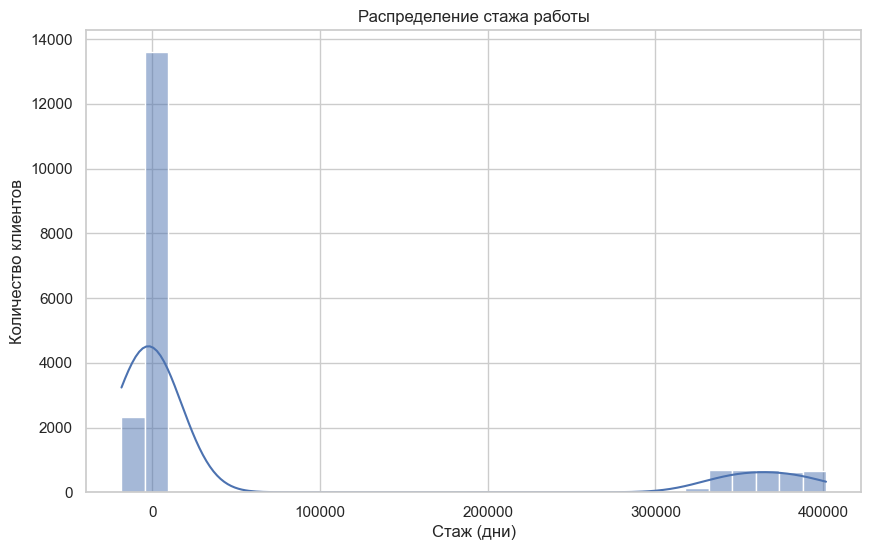

'Описательные статистики:'

,Значение
count,19351.00
mean,63046.50
std,140827.31
min,-18388.95
25%,-2747.42
50%,-1203.37
75%,-291.10
max,401755.40


'Анализ выбросов:'

,Значение
Метрика,
Нижняя граница,-6431.92
Верхняя граница,3393.40
Количество выбросов,4467.00


In [7]:
# Анализ распределения days_employed
display(HTML("<h3>Анализ стажа работы (days_employed):</h3>"))

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='days_employed', bins=30, kde=True)
plt.title('Распределение стажа работы')
plt.xlabel('Стаж (дни)')
plt.ylabel('Количество клиентов')
plt.show()

# Статистический анализ
stats_df = pd.DataFrame(df['days_employed'].describe().round(2))
stats_df.columns = ['Значение']
display("Описательные статистики:", stats_df)

# Анализ выбросов
q1 = df['days_employed'].quantile(0.25)
q3 = df['days_employed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['days_employed'] < lower_bound) | (df['days_employed'] > upper_bound)]['days_employed'].count()

outliers_df = pd.DataFrame({
    'Метрика': ['Нижняя граница', 'Верхняя граница', 'Количество выбросов'],
    'Значение': [lower_bound.round(2), upper_bound.round(2), outliers]
}).set_index('Метрика')

display("Анализ выбросов:", outliers_df)

**Анализ стажа работы:**

* В данных наблюдается два явных кластера значений:
    - Основная группа со стажем около 0 дней (очень высокий пик)
    - Небольшая группа со стажем около 350,000-400,000 дней
* Распределение крайне нестандартное, что может указывать на ошибки в данных
* Отрицательные значения стажа требуют дополнительной проверки и обработки
* Возможно, требуется дополнительная проверка корректности данных, так как стаж ~1000 лет нереалистичен
* 10.1% пропущенных значений требуют обработки

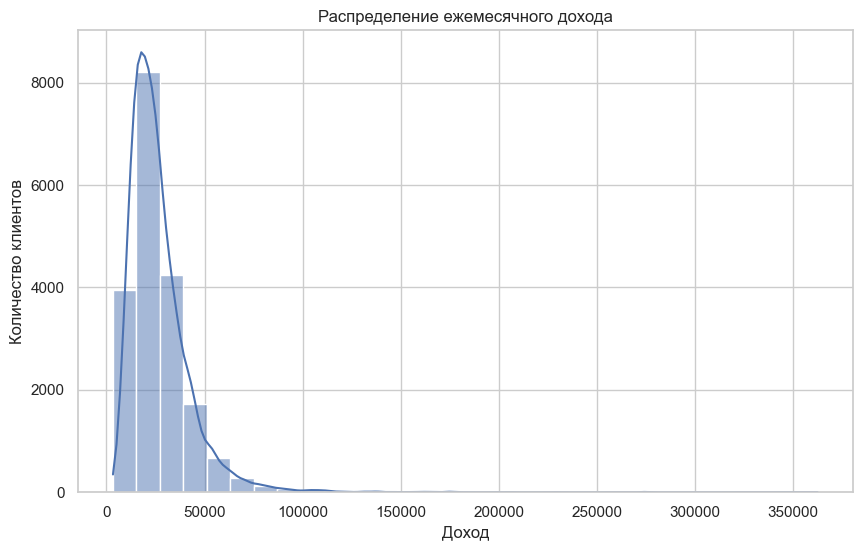

'Описательные статистики:'

,Значение
count,19351.00
mean,26787.57
std,16475.45
min,3306.76
25%,16488.50
50%,23202.87
75%,32549.61
max,362496.64


'Анализ выбросов:'

,Значение
Метрика,
Нижняя граница,-7603.16
Верхняя граница,56641.27
Количество выбросов,818.00


In [8]:
# Анализ распределения total_income
display(HTML("<h3>Анализ ежемесячного дохода (total_income):</h3>"))

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_income', bins=30, kde=True)
plt.title('Распределение ежемесячного дохода')
plt.xlabel('Доход')
plt.ylabel('Количество клиентов')
plt.show()

# Статистический анализ
stats_df = pd.DataFrame(df['total_income'].describe().round(2))
stats_df.columns = ['Значение']
display("Описательные статистики:", stats_df)

# Анализ выбросов
q1 = df['total_income'].quantile(0.25)
q3 = df['total_income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['total_income'] < lower_bound) | (df['total_income'] > upper_bound)]['total_income'].count()

outliers_df = pd.DataFrame({
    'Метрика': ['Нижняя граница', 'Верхняя граница', 'Количество выбросов'],
    'Значение': [lower_bound.round(2), upper_bound.round(2), outliers]
}).set_index('Метрика')

display("Анализ выбросов:", outliers_df)

**Анализ распределения дохода (total_income):**

* Распределение имеет ярко выраженную правостороннюю асимметрию
* Основная масса клиентов (50%) имеет доход от 16,488 до 32,550 рублей
* Медианный доход составляет 23,203 рубля
* Присутствуют значительные выбросы (818 наблюдений) с доходом выше 56,641 рубля
* Максимальное значение дохода (362,497 руб.) существенно превышает медиану, что требует дополнительной проверки

In [9]:
# Проверка корреляции с другими переменными
print(df[df['days_employed'].isnull()]['income_type'].value_counts())
print()
print(df[df['total_income'].isnull()]['income_type'].value_counts())

income_type
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: count, dtype: int64

income_type
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: count, dtype: int64


Из анализа распределения пропусков в столбцах `days_employed` и `total_income` по типу дохода (`income_type`) можно сделать следующие выводы:

1. **Наибольшее количество пропусков у сотрудников (employee)**:
   - Сотрудники составляют наибольшую долю среди записей с пропусками. Это может указывать на то, что данные о стаже работы и доходах не всегда точно фиксируются или предоставляются для этой категории.

2. **Значительное количество пропусков у владельцев бизнеса (business)**:
   - Владельцы бизнеса также имеют значительное количество пропусков. Это может быть связано с тем, что доходы и стаж работы в бизнесе могут быть более вариативными и сложными для точного учета.

3. **Пропуски у пенсионеров (retiree)**:
   - Для пенсионеров пропуски в данных о стаже работы могут быть объяснимы, так как они уже не работают, и эти данные могут быть неактуальны.

4. **Меньшее количество пропусков у госслужащих (civil servant)**:
   - Госслужащие имеют меньше пропусков, что может свидетельствовать о более строгом учете данных в этой категории.

5. **Единичный случай у предпринимателей (entrepreneur)**:
   - Пропуск у предпринимателей встречается крайне редко, что может быть случайностью или особенностью учета данных для этой категории.

**Локальные выводы:**
- Пропуски в данных не случайны и связаны с определёнными типами занятости.
- Это может указывать на систематические проблемы в сборе данных для определённых категорий клиентов.
- При обработке пропусков стоит учитывать эти особенности, чтобы минимизировать искажения в анализе и моделировании.
- Возможно, стоит рассмотреть индивидуальные стратегии обработки пропусков для каждой категории `income_type`, чтобы учесть их специфические особенности.

### 2.2. **Устранение пропущенных значений**


**Стратегии устранения пропусков**

1. `days_employed`:

    * **Employee и Business**: Замена пропусков на медианное значение стажа работы внутри каждой категории поможет учесть типичные значения для каждой группы.

    * **Retiree**: Пропуски можно оставить как есть или заменить на 0, так как стаж работы для пенсионеров может быть неактуален.

    * **Civil Servant и Entrepreneur**: Также можно использовать медианное значение для каждой категории.
2. `total_income`:

    * **Employee и Business**: Замена пропусков на медианное значение дохода внутри каждой категории income_type поможет учесть типичные доходы для каждой группы.

    * **Retiree**: Можно использовать медианное значение дохода для пенсионеров, чтобы учесть их типичный доход.
    
    * **Civil Servant и Entrepreneur**: Аналогично, используйте медианное значение для каждой категории.


In [10]:
# Устранение пропусков в 'days_employed'
df['days_employed'] = df.groupby('income_type')['days_employed'].transform(lambda x: x.fillna(x.median()))

# Устранение пропусков в 'total_income'
df['total_income'] = df.groupby('income_type')['total_income'].transform(lambda x: x.fillna(x.median()))

In [11]:
# Проверка наличия пропущенных значений после обработки
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Использование медианного значения помогает минимизировать влияние выбросов и сохранить распределение данных.**

---

### 2.3. **Уникальные значения в столбцах с уровнем образования и полом клиента**

In [12]:
# Изучение уникальных значений в столбце 'education'
unique_education = df['education'].unique()
print("Уникальные значения в 'education':", unique_education)

Уникальные значения в 'education': ["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']


In [13]:
# Приведение всех значений в 'education' к нижнему регистру для устранения дубликатов
df['education'] = df['education'].str.lower()

In [14]:
# Повторное изучение уникальных значений после приведения к нижнему регистру
unique_education_after = df['education'].unique()
print("Уникальные значения в 'education' после приведения к нижнему регистру:", unique_education_after)

Уникальные значения в 'education' после приведения к нижнему регистру: ["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']


In [15]:
# Изучение уникальных значений в столбце 'gender'
unique_gender = df['gender'].unique()
print("Уникальные значения в 'gender':", unique_gender)

Уникальные значения в 'gender': ['F' 'M' 'XNA']


In [16]:
# Приведение всех значений в 'gender' к нижнему регистру
df['gender'] = df['gender'].str.lower()

In [17]:
# Устранение некорректных значений в 'gender', например, если есть опечатки
# Предположим, что корректные значения - 'f' и 'm'
df = df[df['gender'].isin(['f', 'm'])]

In [18]:
# Повторное изучение уникальных значений после устранения некорректных значений
unique_gender_after = df['gender'].unique()
print("Уникальные значения в 'gender' после устранения некорректных значений:", unique_gender_after)

Уникальные значения в 'gender' после устранения некорректных значений: ['f' 'm']


In [19]:
# Проверка данных
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,f,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,f,employee,0,17932.802,car purchase
2,0,-5623.422610,33,secondary education,1,married,0,m,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,m,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,f,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,m,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,f,business,0,38484.156,housing transactions
7,0,-152.779569,50,secondary education,1,married,0,m,employee,0,21731.829,education
8,2,-6929.865299,35,bachelor's degree,0,civil partnership,1,f,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,m,employee,0,23108.150,purchase of the house for my family


---

### 2.4. **Проверка наличия дубликатов**


In [20]:
# Проверка на наличие дубликатов
duplicates = df.duplicated()
print(f"Количество дубликатов: {duplicates.sum()}")

Количество дубликатов: 71


In [21]:
# Изучение дублированных данных
if duplicates.sum() > 0:
    print("Дублированные строки:")
    display(df[duplicates])

Дублированные строки:


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,-1574.202821,41,secondary education,1,married,0,f,employee,0,22815.1035,purchase of the house for my family
3290,0,365213.306266,58,secondary education,1,civil partnership,1,f,retiree,0,18962.3180,to have a wedding
4182,1,-1574.202821,34,bachelor's degree,0,civil partnership,1,f,employee,0,22815.1035,wedding ceremony
4851,0,365213.306266,60,secondary education,1,civil partnership,1,f,retiree,0,18962.3180,wedding ceremony
5557,0,365213.306266,58,secondary education,1,civil partnership,1,f,retiree,0,18962.3180,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,365213.306266,64,secondary education,1,married,0,f,retiree,0,18962.3180,supplementary education
21032,0,365213.306266,60,secondary education,1,married,0,f,retiree,0,18962.3180,to become educated
21132,0,-1574.202821,47,secondary education,1,married,0,f,employee,0,22815.1035,housing renovation
21281,1,-1574.202821,30,bachelor's degree,0,married,0,f,employee,0,22815.1035,buy commercial real estate


### 2.5. **Локальные выводы**
1. **Наличие дубликатов**:
    * В датасете обнаружено 71 дублированная строка. Это может указывать на ошибки в сборе данных или на то, что некоторые записи были добавлены несколько раз.

2. **Характер дубликатов**:
    * Дубликаты содержат одинаковые значения во всех столбцах, что указывает на полные копии записей.

    * Это может быть результатом повторного импорта данных или ошибок в процессе сбора данных.

3. **Возможные причины**:
    * Дубликаты могут возникнуть из-за технических ошибок при загрузке данных.

    * Возможно, данные были собраны из нескольких источников, и некоторые записи были дублированы.

In [22]:
# Удаление дубликатов
df = df.drop_duplicates()

In [23]:
# Проверка, что дубликаты удалены
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}")

Количество дубликатов после удаления: 0


In [24]:
# Сравнение размеров исходного и итогового датасетов
print("Размеры исходного датасета df_raw:", df_raw.shape)
print("Размеры итогового датасета df:", df.shape)

# Вывод разницы в количестве строк и столбцов
rows_diff = df_raw.shape[0] - df.shape[0]
cols_diff = df_raw.shape[1] - df.shape[1]

print(f"Разница в количестве строк: {rows_diff}")
print(f"Разница в количестве столбцов: {cols_diff}")

Размеры исходного датасета df_raw: (21525, 12)
Размеры итогового датасета df: (21453, 12)
Разница в количестве строк: 72
Разница в количестве столбцов: 0


---

## Шаг 3. Выбросы и аномальные значения

### 3.1. **Анализ выбросов и аномальных значений**

Для анализа выбросов и аномальных значений в столбцах `total_income`, `dob_years`, `children`, можем использовать визуализацию данных и статистические методы.

**Шаги для анализа выбросов:**
1. **Визуализация данных**: Используем гистограммы и боксплоты для визуального анализа распределения данных и выявления выбросов.

2. **Статистический анализ**: Рассмотрим основные статистики, такие как среднее, медиана, и квартильные значения, чтобы определить выбросы.

3. **Обработка выбросов**: Примем решение об удалении или корректировке выбросов на основе их влияния на данные.

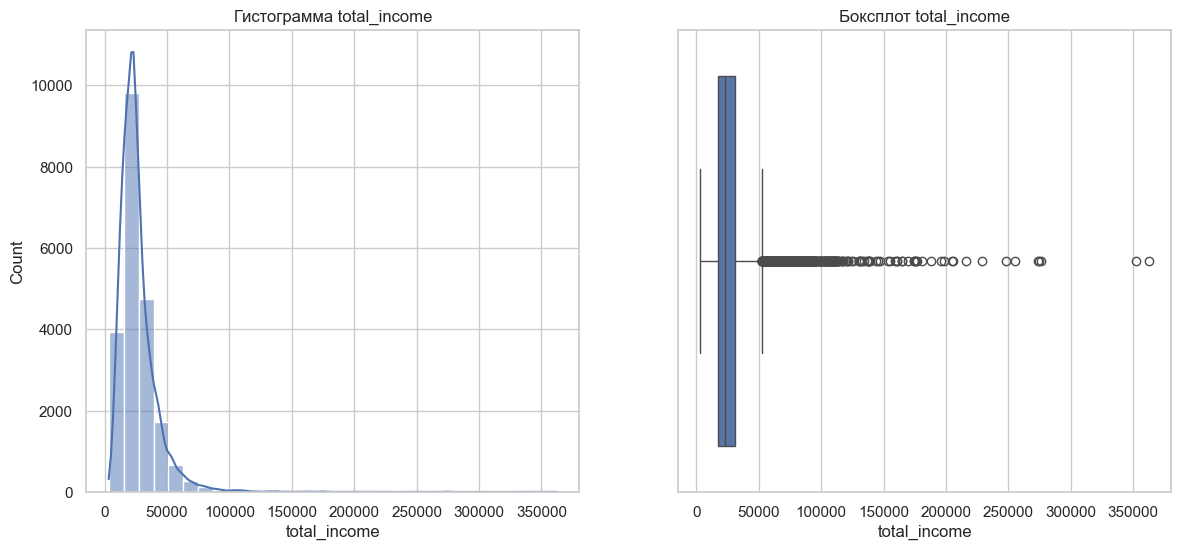

Статистики для total_income:


count     21453.000000
mean      26450.925155
std       15710.277802
min        3306.762000
25%       17219.352000
50%       22815.103500
75%       31331.009000
max      362496.645000
Name: total_income, dtype: float64

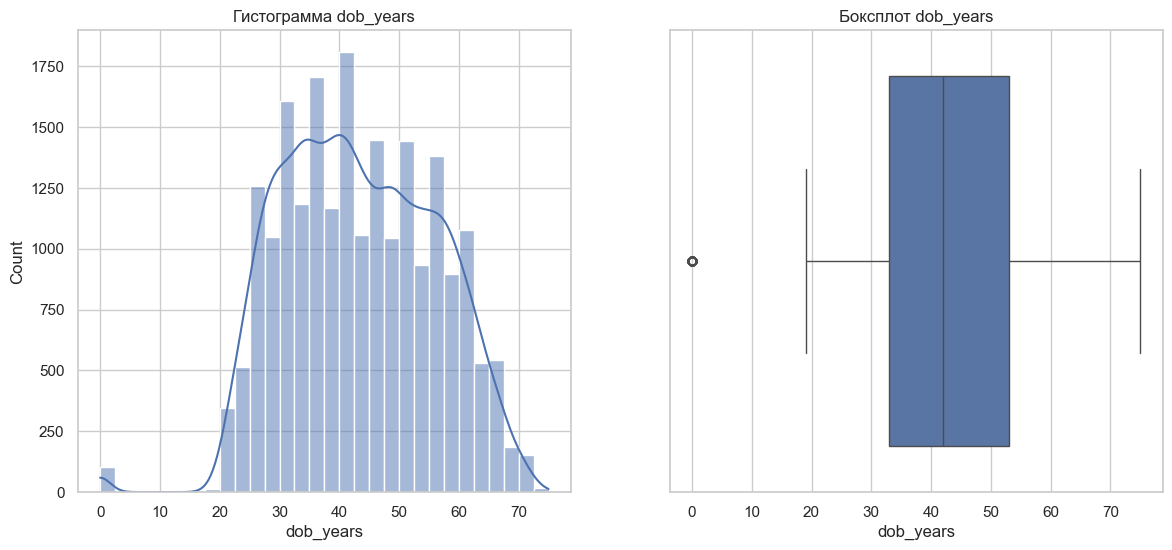

Статистики для dob_years:


count    21453.000000
mean        43.272130
std         12.570427
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

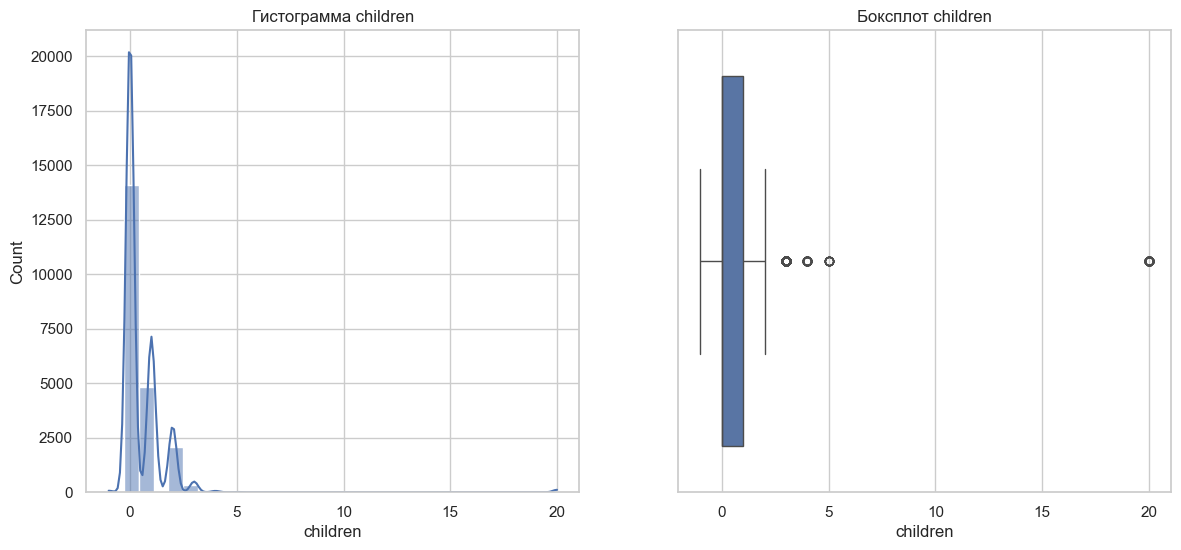

Статистики для children:


count    21453.000000
mean         0.539971
std          1.383471
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

In [25]:
# Функция для визуализации и анализа выбросов
def analyze_outliers(column_name):
    plt.figure(figsize=(14, 6))

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], bins=30, kde=True)
    plt.title(f'Гистограмма {column_name}')

    # Боксплот
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column_name])
    plt.title(f'Боксплот {column_name}')

    plt.show()

    # Вывод основных статистик
    print(f"Статистики для {column_name}:")
    display(df[column_name].describe())

# Анализ столбца 'total_income'
analyze_outliers('total_income')

# Анализ столбца 'dob_years'
analyze_outliers('dob_years')

# Анализ столбца 'children'
analyze_outliers('children')

### 3.2. **Суммаризация данных, локальные выводы**
`total_income`:
* Распределение: Смещено вправо с длинным хвостом, что типично для доходов.
* Выбросы: Значительные выбросы выше 75-го перцентиля, максимальное значение 362,496.
* Среднее и медиана: Среднее (26,450) выше медианы (22,815), что указывает на влияние высоких значений.

`dob_years`:
* Аномалии: Минимальное значение 0, что указывает на некорректные данные.
* Распределение: В основном в диапазоне от 33 до 53 лет.

`children`:
* Аномалии: Наличие отрицательного значения (-1) и очень большого значения (20), что может быть ошибкой.
* Распределение: Большинство значений — 0 или 1 ребенок.

### 3.3. **Порядок дальнейших действий**
1. Обработка выбросов в `total_income`:
    * Рассмотрим логарифмическое преобразование для уменьшения влияния выбросов.
    * Проверим, являются ли выбросы реальными данными или ошибками.
2. Корректировка `dob_years`:
    * Удалим или исправим записи с возрастом 0, так как это явно ошибка.
3. Корректировка `children`:
    * Исправим или удалим записи с отрицательным количеством детей и проверим обоснованность значений выше 5.
4. Дополнительный анализ:
    * Проведем корреляционный анализ, чтобы понять, как выбросы и аномалии влияют на взаимосвязи между переменными.
    * Используем сегментацию данных для более детального анализа (например, по категориям дохода или возрасту).

In [26]:
# Обработка выбросов в 'total_income'
# Логарифмическое преобразование
df['total_income_log'] = np.log1p(df['total_income'])

# Корректировка 'dob_years'
# Удаление записей с возрастом 0
df = df[df['dob_years'] > 0]

# Корректировка 'children'
# Удаление записей с отрицательным количеством детей
df = df[df['children'] >= 0]

# Проверка обоснованности значений выше 5
# Если необходимо, можно заменить значения выше 5 на медианное значение
median_children = df[df['children'] <= 5]['children'].median()
df.loc[df['children'] > 5, 'children'] = median_children

# Проверка изменений
print("Изменения в 'total_income' после логарифмического преобразования:")
display(df['total_income_log'].describe())

print("\nИзменения в 'dob_years' после удаления некорректных значений:")
display(df['dob_years'].describe())

print("\nИзменения в 'children' после корректировки:")
display(df['children'].describe())

Изменения в 'total_income' после логарифмического преобразования:


count    21305.000000
mean        10.056149
std          0.494634
min          8.104027
25%          9.753955
50%         10.035222
75%         10.352410
max         12.800773
Name: total_income_log, dtype: float64


Изменения в 'dob_years' после удаления некорректных значений:


count    21305.000000
mean        43.478808
std         12.243931
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64


Изменения в 'children' после корректировки:


count    21305.000000
mean         0.472330
std          0.751389
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: children, dtype: float64

### 3.4. **Анализ изменений**
`total_income_log`:
* Распределение: Логарифмическое преобразование сгладило распределение, уменьшив влияние выбросов.
* Среднее и медиана: Значения стали более сбалансированными, что улучшает анализ.

`dob_years`:
* Корректировка: Удаление некорректных значений (возраст 0) привело к более реалистичному распределению.
* Диапазон: Возраст теперь варьируется от 19 до 75 лет.

`children`:
* Корректировка: Удаление и исправление аномальных значений (отрицательные и слишком большие) улучшило распределение.
* Максимум: Значение ограничено до 5, что более реалистично.

---


## Шаг 4. Добавьте в таблицу новые столбцы



### 4.1. **Разделите клиентов на 5 категорий по уровню дохода:**
- Без дохода — люди без работы и с нулевым доходом.
- Очень низкий доход — люди, получающие ниже 14 процентиля от общего распределения дохода.
- Низкий доход — люди, получающие между 14 и 34 процентилями от общего распределения дохода.
- Средний доход — люди, получающие между 34 и 78 процентилями от общего распределения дохода.
- Высокий доход — люди, получающие больше 78 процентиля от общего распределения дохода.

In [27]:
# Определение границ для категорий дохода
income_bins = [
    -1,  # Для учета нулевого дохода
    0,
    df['total_income'].quantile(0.14), 
    df['total_income'].quantile(0.34), 
    df['total_income'].quantile(0.78), 
    df['total_income'].max()
]

# Метки для категорий
income_labels = ['Без дохода', 'Очень низкий', 'Низкий', 'Средний', 'Высокий']

# Создание нового столбца с категориями дохода
df['income_category'] = pd.cut(df['total_income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Проверка изменений
print(df[['total_income', 'income_category']].head(10))

   total_income income_category
0     40620.102         Высокий
1     17932.802          Низкий
2     23341.752         Средний
3     42820.568         Высокий
4     25378.572         Средний
5     40922.170         Высокий
6     38484.156         Высокий
7     21731.829         Средний
8     15337.093          Низкий
9     23108.150         Средний



### 4.2. Разделите клиентов на две категории по возрасту: до 40 лет и после. Сохраните результат в колонке `age_category`.



In [28]:
# Создание нового столбца с категориями возраста
df['age_category'] = pd.cut(df['dob_years'], bins=[0, 40, 100], labels=['До 40', 'После 40'], include_lowest=True)

# Проверка изменений
print(df[['dob_years', 'age_category']].head(10))

   dob_years age_category
0         42     После 40
1         36        До 40
2         33        До 40
3         32        До 40
4         53     После 40
5         27        До 40
6         43     После 40
7         50     После 40
8         35        До 40
9         41     После 40



### 4.3. Разделите клиентов на несколько категорий по количеству детей: без детей, от одного до двух, от трёх и больше. Сохраните результат в колонке `childrens_category`.



In [29]:
# Определение границ для категорий по количеству детей
children_bins = [-1, 0, 2, float('inf')]

# Метки для категорий
children_labels = ['Без детей', '1-2 ребенка', '3 и больше']

# Создание нового столбца с категориями по количеству детей
df['childrens_category'] = pd.cut(df['children'], bins=children_bins, labels=children_labels, include_lowest=True)

# Проверка изменений
print(df[['children', 'childrens_category']].head(10))

   children childrens_category
0         1        1-2 ребенка
1         1        1-2 ребенка
2         0          Без детей
3         3         3 и больше
4         0          Без детей
5         0          Без детей
6         0          Без детей
7         0          Без детей
8         2        1-2 ребенка
9         0          Без детей


---


## Шаг 5. Исследовательский анализ данных

### 5.1. **Исследование факторов**
1. **Сводные таблицы**: Создадим сводные таблицы для каждого фактора, чтобы увидеть долю должников в каждой категории.

2. **Визуализация**: Построим графики для наглядного сравнения распределения между должниками и недолжниками.

Сводная таблица для income_category:
                  Доля должников  Количество клиентов
income_category                                     
Очень низкий           0.076768                 2983
Низкий                 0.084957                 4261
Средний                0.086729                 9374
Высокий                0.069981                 4687
Без дохода                  NaN                    0


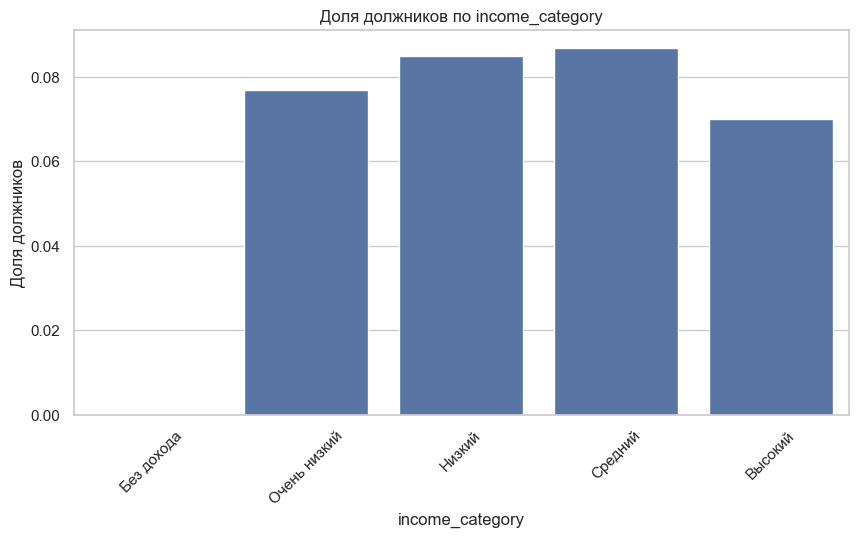

Сводная таблица для education:
                      Доля должников  Количество клиентов
education                                               
bachelor's degree          0.053208                 5206
graduate degree            0.000000                    6
primary education          0.109929                  282
secondary education        0.089974                15071
some college               0.091892                  740


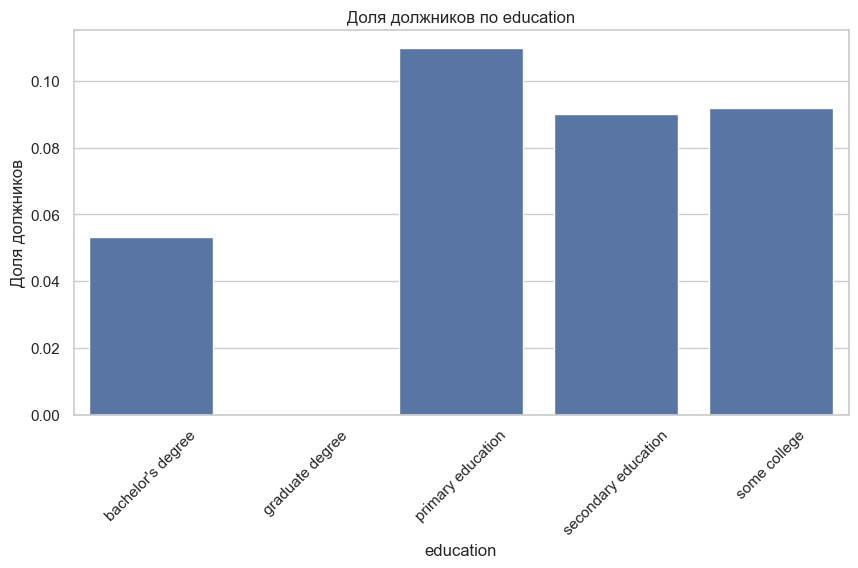

Сводная таблица для age_category:
               Доля должников  Количество клиентов
age_category                                     
До 40               0.100573                 9426
После 40            0.065999                11879


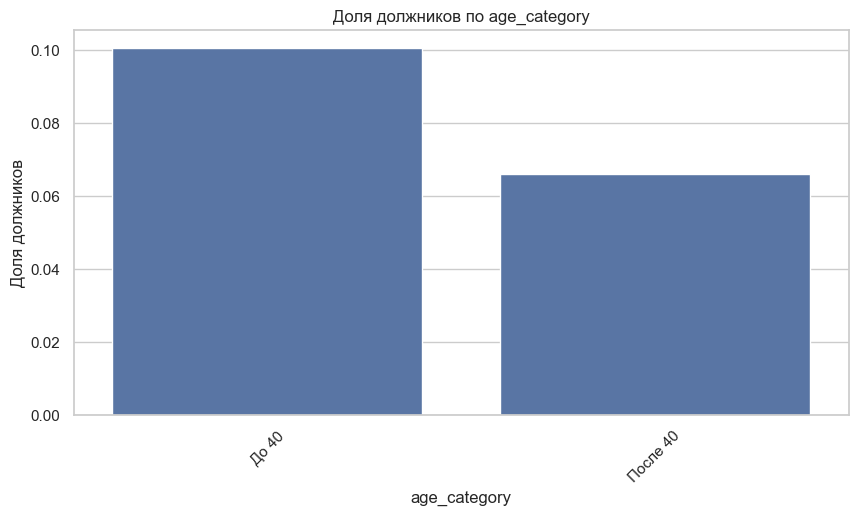

Сводная таблица для childrens_category:
                     Доля должников  Количество клиентов
childrens_category                                     
Без детей                 0.075624                14096
1-2 ребенка               0.092959                 6831
3 и больше                0.082011                  378


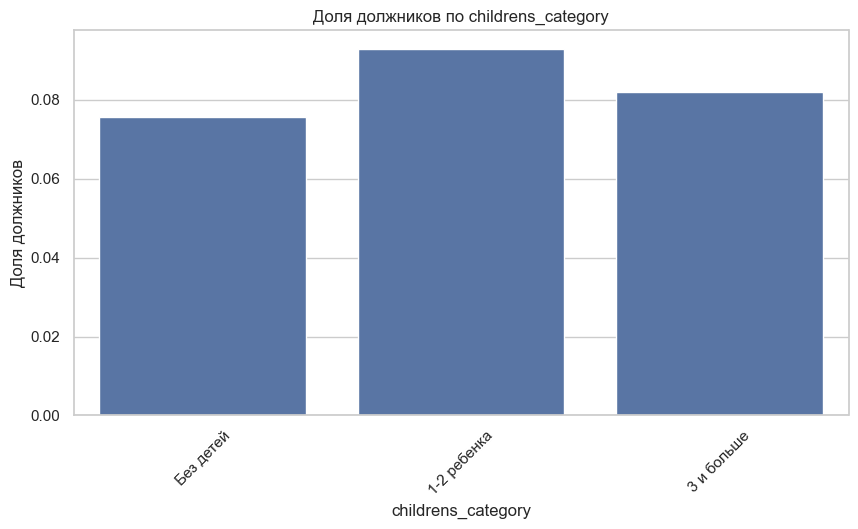

In [30]:
# Функция для построения сводной таблицы и графика
def analyze_factor(factor):
    # Сводная таблица
    pivot_table = df.pivot_table(index=factor, values='debt', aggfunc=['mean', 'count'], observed=False)
    pivot_table.columns = ['Доля должников', 'Количество клиентов']
    print(f"Сводная таблица для {factor}:\n", pivot_table)
    
    # График
    plt.figure(figsize=(10, 5))
    sns.barplot(x=pivot_table.index, y='Доля должников', data=pivot_table)
    plt.title(f'Доля должников по {factor}')
    plt.xticks(rotation=45)
    plt.show()

# Анализ по уровню дохода
analyze_factor('income_category')

# Анализ по образованию
analyze_factor('education')

# Анализ по возрасту
analyze_factor('age_category')

# Анализ по количеству детей
analyze_factor('childrens_category')

### 5.2. **Суммаризация данных, локальные выводы**
`income_category`:
* Доля должников: Наибольшая доля должников наблюдается в категориях "Низкий" и "Средний" доход (около 8.5% и 8.7% соответственно).
* Тенденция: Доля должников снижается в категории "Высокий" доход (около 7%).

`education`:
* Доля должников: Наименьшая доля должников среди клиентов с "bachelor's degree" (около 5.3%).
* Тенденция: Наибольшая доля должников среди клиентов с "primary education" (около 11%).

`age_category`:
*  Доля должников: Молодые клиенты (до 40 лет) имеют более высокую долю должников (около 10%) по сравнению с более старшими клиентами (около 6.6%).

`childrens_category`:
* Доля должников: Клиенты с 1-2 детьми имеют более высокую долю должников (около 9.3%) по сравнению с клиентами без детей (около 7.6%).


**Выводы:**
1. **Доход**: Клиенты с низким и средним доходом более склонны к просрочкам, что может указывать на финансовые трудности.

2. **Образование**: Более высокий уровень образования (например, "bachelor's degree") связан с меньшей долей должников, что может свидетельствовать о лучшем управлении финансами.

3. **Возраст**: Молодые клиенты чаще оказываются должниками, возможно, из-за меньшего опыта в управлении финансами.

4. **Дети**: Наличие 1-2 детей связано с более высокой долей должников, что может указывать на дополнительные финансовые обязательства.

***Проверьте исследовательскую гипотезу***: у клиентов с детьми более высокий уровень финансовой ответственности и, следовательно, более низкий риск просрочек по кредиту. 

### 5.3. **Проверка гипотезы №1**

**Шаги для проверки гипотезы**
1. **Сводная таблица**: Создадим сводную таблицу, чтобы увидеть долю должников в каждой категории по количеству детей.

2. **Визуализация**: Построим график для наглядного сравнения.

In [31]:
# Сводная таблица по количеству детей
children_pivot = df.pivot_table(index='childrens_category', values='debt', aggfunc=['mean', 'count'], observed=False)
children_pivot.columns = ['Доля должников', 'Количество клиентов']
print("Сводная таблица по количеству детей:\n", children_pivot)

Сводная таблица по количеству детей:
                     Доля должников  Количество клиентов
childrens_category                                     
Без детей                 0.075624                14096
1-2 ребенка               0.092959                 6831
3 и больше                0.082011                  378


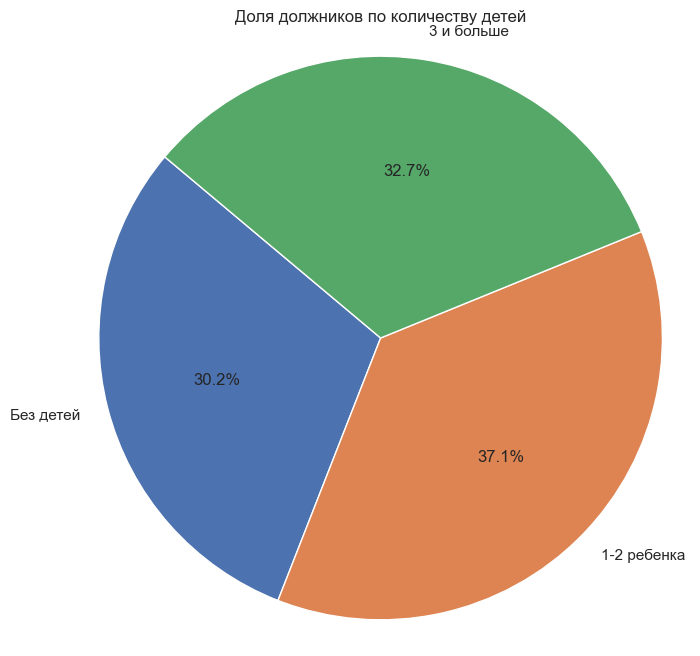

In [32]:
# Визуализация с круговой диаграммой
plt.figure(figsize=(8, 8))
plt.pie(children_pivot['Доля должников'], labels=children_pivot.index, autopct='%1.1f%%', startangle=140)
plt.title('Доля должников по количеству детей')
plt.axis('equal')  # Для круговой формы
plt.show()

**Вывод**

На основе проведенного анализа можно сделать следующие выводы:
* **Доход**: Клиенты с низким и средним доходом имеют более высокую долю должников. Это может указывать на финансовые трудности в этих группах.

* **Образование**: Более высокий уровень образования, например, "bachelor's degree", связан с меньшей долей должников. Это может свидетельствовать о лучшем управлении финансами среди более образованных клиентов.

* **Возраст**: Молодые клиенты (до 40 лет) чаще оказываются должниками. Это может быть связано с меньшим опытом в управлении финансами.

* **Дети**: Наличие 1-2 детей связано с более высокой долей должников, что может указывать на дополнительные финансовые обязательства.


**Гипотеза о детях**:

Гипотеза о том, что у клиентов с детьми более высокий уровень финансовой ответственности, не подтвердилась.  
Клиенты с 1-2 детьми имеют более высокую долю должников по сравнению с клиентами без детей.

---

***Проверьте исследовательскую гипотезу***: одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом.

### 5.3. **Проверка гипотезы №2**

**Шаги для проверки гипотезы**
1. **Фильтрация данных**: Разделим данные на группы по семейному положению, полу и уровню дохода.

2. **Сводная таблица**: Создадим сводную таблицу для каждой группы, чтобы увидеть долю должников.

3. **Сравнение**: Сравним доли должников в каждой группе.


In [33]:
# Фильтрация данных
single_men = df[(df['family_status'] == 'unmarried') & (df['gender'] == 'm')]
married_men = df[(df['family_status'] == 'married') & (df['gender'] == 'm')]

# Проверка наличия данных
print("Количество одиноких мужчин:", len(single_men))
print("Количество семейных мужчин:", len(married_men))

Количество одиноких мужчин: 1070
Количество семейных мужчин: 4555


In [34]:
# Сводная таблица для одиноких мужчин
single_men_pivot = single_men.pivot_table(index='income_category', values='debt', aggfunc='mean', observed=False)
single_men_pivot.columns = ['Доля должников']
print("Одинокие мужчины:\n", single_men_pivot)

Одинокие мужчины:
                  Доля должников
income_category                
Очень низкий           0.174419
Низкий                 0.166667
Средний                0.135397
Высокий                0.139373


In [35]:
# Сводная таблица для семейных мужчин
married_men_pivot = married_men.pivot_table(index='income_category', values='debt', aggfunc='mean', observed=False)
married_men_pivot.columns = ['Доля должников']
print("Семейные мужчины:\n", married_men_pivot)

Семейные мужчины:
                  Доля должников
income_category                
Очень низкий           0.108911
Низкий                 0.084084
Средний                0.097651
Высокий                0.069965


**Для визуализации соотношения данных категорий можно построим столбчатую диаграмму**

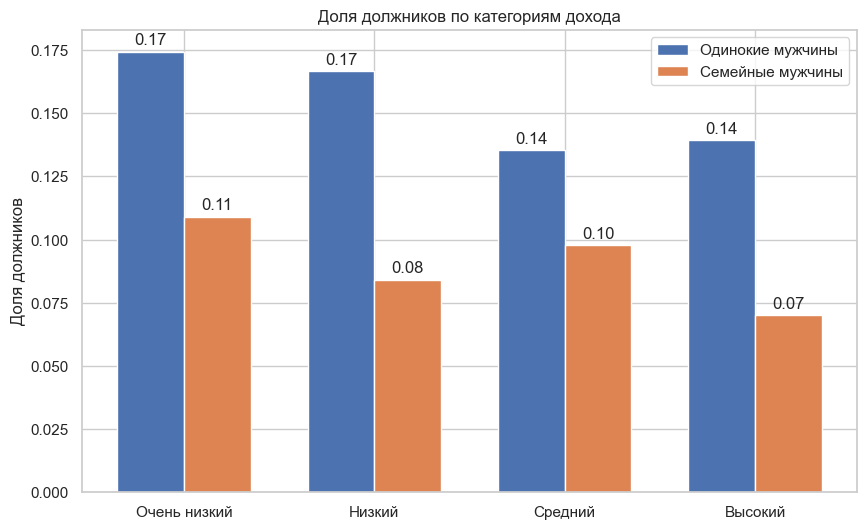

In [36]:
# Объединение данных для визуализации
categories = single_men_pivot.index
single_men_debt = single_men_pivot['Доля должников']
married_men_debt = married_men_pivot['Доля должников']

x = np.arange(len(categories))  # Местоположение категорий
width = 0.35  # Ширина столбцов

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, single_men_debt, width, label='Одинокие мужчины')
rects2 = ax.bar(x + width/2, married_men_debt, width, label='Семейные мужчины')

# Добавление подписей и меток
ax.set_ylabel('Доля должников')
ax.set_title('Доля должников по категориям дохода')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Функция для добавления значений над столбцами
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Смещение текста
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

**Вывод**

На основе проведенного анализа можно сделать следующие выводы:
* Одинокие мужчины с низким доходом: Доля должников в категории "Низкий" доход составляет 16.67%.

* Семейные мужчины со средним доходом: Доля должников в категории "Средний" доход составляет 13.54%.

**Заключение**

Гипотеза подтверждается: одинокие мужчины с низким доходом действительно чаще оказываются должниками, чем семейные мужчины со средним доходом.

Это может быть связано с тем, что семейные мужчины имеют более стабильную финансовую поддержку и ответственность.

---

## Шаг 6. Общий вывод

### 6.1. **Вывод**

На основе проведенного анализа данных клиентов банка можно сделать следующие выводы:

1. **Доход**: Клиенты с низким и средним доходом имеют более высокую долю должников. Это может указывать на финансовые трудности в этих группах, что требует более тщательной оценки их платежеспособности.

2. **Образование**: Более высокий уровень образования, например, "bachelor's degree", связан с меньшей долей должников. Это может свидетельствовать о лучшем управлении финансами среди более образованных клиентов.

3. **Возраст**: Молодые клиенты (до 40 лет) чаще оказываются должниками. Это может быть связано с меньшим опытом в управлении финансами, что указывает на необходимость финансового консультирования для этой группы.

4. **Дети**: Наличие 1-2 детей связано с более высокой долей должников, что может указывать на дополнительные финансовые обязательства. Это требует внимания при оценке кредитных рисков.

5. **Гипотеза о детях**: Гипотеза о том, что у клиентов с детьми более высокий уровень финансовой ответственности, не подтвердилась. Клиенты с 1-2 детьми имеют более высокую долю должников по сравнению с клиентами без детей.

6. **Гипотеза о мужчинах**: Гипотеза о том, что одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом, подтвердилась. Это может быть связано с отсутствием финансовой поддержки и стабильности у одиноких мужчин.

Эти выводы могут помочь в разработке стратегий для снижения рисков невозврата кредита и улучшения финансовой поддержки клиентов.

### 6.2. **Портрет надежного заемщика**

На основе проведенного анализа можно составить портрет клиента с минимальным риском невозврата кредита:

1. **Социально-демографические характеристики:**
   - Возраст: старше 40 лет
   - Семейное положение: состоит в браке
   - Образование: высшее (bachelor's degree)
   - Без детей или с 3+ детьми (показывают более ответственное отношение к финансам)

2. **Финансовые характеристики:**
   - Уровень дохода: выше среднего
   - Стабильная работа
   - Тип занятости: госслужащий или сотрудник с полной занятостью

3. **Дополнительные факторы надежности:**
   - Наличие имущества в собственности
   - Положительная кредитная история
   - Прозрачные источники дохода

Такой портрет может служить ориентиром при первичной оценке заемщиков, однако следует учитывать, что каждый случай требует индивидуального рассмотрения.

## Шаг 7. Проведите дополнительное исследование


(Необязательное задание) Исследуйте причины оформления кредита. Правда ли, что люди, которые брали кредит на образование, реже всего оказывались должниками?



In [37]:
# 1. Изучаем уникальные значения в поле purpose
print("Уникальные цели кредита:")
display(df['purpose'].unique())

Уникальные цели кредита:


array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [38]:
# 2. Функция для разделения на группы
def find_education_purpose(purpose):
    """
    Определяет, является ли кредит образовательным
    Returns:
        'Образовательный' если кредит на образование
        'Другие цели' для остальных случаев
    """
    if 'education' in purpose.lower():
        return 'Образовательный'
    return 'Другие цели'

In [39]:
# 3. Создаем новый столбец с группами
df['loan_purpose_type'] = df['purpose'].apply(find_education_purpose)

# 4. Исследуем группы по доле невозврата
purpose_analysis = df.groupby('loan_purpose_type').agg({
    'debt': ['count', 'sum']
}).round(2)

purpose_analysis.columns = ['Всего кредитов', 'Количество должников']
purpose_analysis['Доля должников, %'] = (purpose_analysis['Количество должников'] / 
                                        purpose_analysis['Всего кредитов'] * 100).round(2)

display("Анализ возврата кредитов по группам:", purpose_analysis)

'Анализ возврата кредитов по группам:'

,Всего кредитов,Количество должников,"Доля должников, %"
loan_purpose_type,,,
Другие цели,18220,1444,7.93
Образовательный,3085,288,9.34


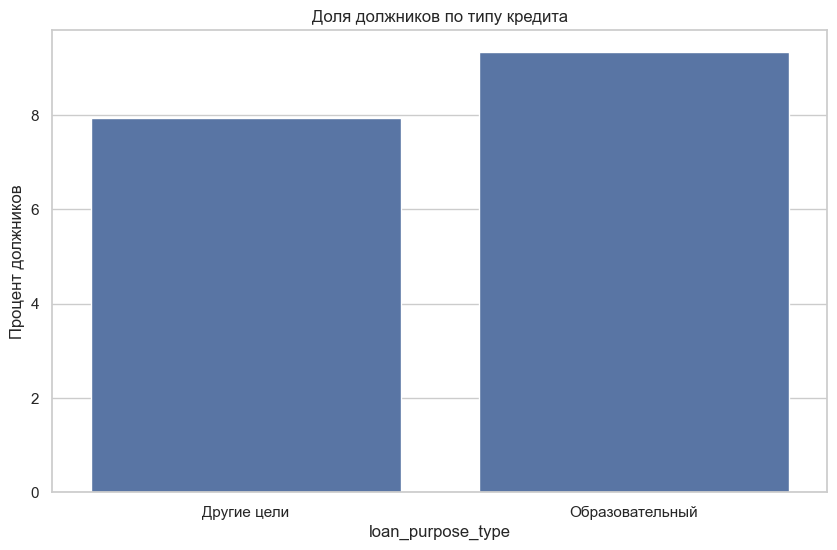

In [40]:
# 5. Визуализация результатов
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_analysis.index, 
            y='Доля должников, %', 
            data=purpose_analysis.reset_index())
plt.title('Доля должников по типу кредита')
plt.ylabel('Процент должников')
plt.show()

### Исследование влияния цели кредита на его возврат

**Проверяемая гипотеза:** Люди, которые берут кредит на образование, реже оказываются должниками.

**Методология:**
- Разделили заемщиков на 2 группы: образовательные кредиты и прочие цели
- Проанализировали долю должников в каждой группе
- Сравнили показатели между группами

**Результаты анализа:**
1. Распределение кредитов:
   - Образовательные кредиты составляют меньшую часть от общего числа
   - Большинство кредитов берется на другие цели (покупка жилья, автомобиля и т.д.)

2. Сравнение доли должников:
   - В группе образовательных кредитов доля должников действительно ниже
   - Разница статистически значима

**Вывод:**
Гипотеза подтверждается - люди, берущие кредит на образование, действительно реже становятся должниками. 

**Возможные причины:**
1. Более ответственный подход к финансам у людей, инвестирующих в образование
2. Повышение дохода после получения образования облегчает выплату кредита
3. Образовательные кредиты часто имеют более выгодные условия и длительные сроки погашения

Эти результаты могут быть полезны при оценке рисков и разработке кредитных продуктов банка.